In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline
import seaborn as sns

In [2]:
xls=pd.ExcelFile('credit card data.xlsx')

In [3]:
pd.set_option('display.max_rows',500)

In [4]:
acq=pd.read_excel(xls,'Customer Acqusition')
spend=pd.read_excel(xls,'Spend')
repay=pd.read_excel(xls,'Repayment')

In [6]:
# 1. In the above dataset,
# a. In case age is less than 18, replace it with mean of age values.

In [5]:
acq.loc[acq.Age<18,'Age']=acq['Age'].mean()

In [8]:
# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
# (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [6]:
merge1=pd.merge(acq,spend,how='inner',on='Customer')
merge1.drop('Sl No:',axis=1,inplace=True)
merge1

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,467747.601626
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,86878.954735
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,269175.011875
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,3406.639477
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,BIKE,94369.178802
1496,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,AUTO,134404.666159
1497,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,SHOPPING,446110.920182
1498,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,AIR TICKET,108137.195169


In [7]:
merge1.loc[merge1.Amount>merge1.Limit,'Amount']=0.5*merge1['Limit']

In [ ]:
# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [8]:
merge1=merge1.rename(columns={'Amount':'Spend','Month':'Spend_date'})
merge2=pd.merge(merge1,repay,how='inner',on='Customer')
merge2.drop('SL No:',axis=1,inplace=True)
merge2

,No,Customer,Age,City,Product,Limit,Company,Segment,Spend_date,Type,Spend,Month,Amount
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-12,338932.141919
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-03,131778.688758
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-15,485981.516736
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-25,452865.826385
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,BIKE,94369.178802,2004-01-25,462073.813332
37280,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,AUTO,5000.000000,2004-01-12,269952.597005
37281,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,SHOPPING,5000.500000,2004-01-03,486616.462801
37282,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,AIR TICKET,5001.000000,2004-01-15,259682.427631


In [9]:
merge2.loc[merge2.Amount>merge2.Limit,'Amount']=merge2.Limit

In [ ]:
# 2. From the above dataset create the following summaries:
# a. How many distinct customers exist?

In [10]:
print("Total Distinct customers are ",merge2.Customer.nunique())

Total Distinct customers are  100


In [54]:
# b. How many distinct categories exist?

In [11]:
print("Total Distinct categories are ",merge2.Type.nunique())

Total Distinct categories are  15


In [57]:
# c. What is the average monthly spend by customers?

In [12]:
merge2['Spend_date'] = pd.to_datetime(merge2['Spend_date'])
merge2['Spend_month'] = merge2['Spend_date'].dt.month

In [13]:
merge2.groupby(['Customer','Spend_month'])['Spend'].mean()

Customer  Spend_month
A1        1              246216.555814
          2              407517.806604
          4              459842.299566
          5              203037.493821
          8              305194.318975
                             ...      
A95       1              281975.205712
A96       1               94369.178802
A97       1                5000.000000
A98       1                5000.500000
A99       1                5001.000000
Name: Spend, Length: 578, dtype: float64

In [60]:
# d. What is the average monthly repayment by customers?

In [14]:
merge2['Month'] = pd.to_datetime(merge2['Month'])
merge2['Repay_month'] = merge2['Month'].dt.month
merge2['Repay_year'] = merge2['Month'].dt.year

In [15]:
merge2.groupby(['Customer','Repay_month'])['Amount'].mean()

Customer  Repay_month
A1        1              277759.921338
          2              181723.003932
          4              341465.776049
          7              149833.583362
          9              341741.505563
                             ...      
A95       1              381370.442582
A96       1              100000.000000
A97       1               10000.000000
A98       1               10001.000000
A99       1               10002.000000
Name: Amount, Length: 558, dtype: float64

In [63]:
# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
# (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
# – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [17]:
merge2['profit']=merge2.Amount-merge2.Spend

In [67]:
merge2.loc[merge2.profit>0,'interest']=0.029*merge2.profit

In [18]:
merge2=merge2.fillna(0)

In [19]:
merge2.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Spend_date,Type,Spend,Month,Amount,Spend_month,Repay_month,Repay_year,profit
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-12,338932.141919,1,1,2004,-5122.838893
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-03,131778.688758,1,1,2004,-212276.292055
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-15,485981.516736,1,1,2004,141926.535923
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-25,452865.826385,1,1,2004,108810.845572
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2005-01-17,154684.838196,1,1,2005,-189370.142617


In [81]:
# f. What are the top 5 product types?

In [20]:
merge2.Type.value_counts().nlargest(5)

PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
Name: Type, dtype: int64

In [ ]:
# g. Which city is having maximum spend?

In [21]:
merge2.groupby('City')['Spend'].sum().nlargest(1)

City
COCHIN    1.253554e+09
Name: Spend, dtype: float64

In [ ]:
# h. Which age group is spending more money?

In [22]:
merge2['Age_grp']=pd.cut(merge2['Age'], bins=[0,20,30,40,50,60,70,100], labels=['under 20', '20-30', '30-40','40-50','50-60','60-70','above 70'])

In [23]:
merge2.groupby('Age_grp')['Spend'].sum()

Age_grp
under 20    1.487578e+08
20-30       4.733671e+08
30-40       2.981439e+09
40-50       7.906259e+08
50-60       8.844591e+08
60-70       4.552843e+08
above 70    2.538286e+08
Name: Spend, dtype: float64

In [ ]:
# i. Who are the top 10 customers in terms of repayment?

In [24]:
merge2.groupby('Customer')['Amount'].sum().nlargest(10)

Customer
A61    3.675662e+08
A60    3.483897e+08
A42    2.767827e+08
A13    2.633883e+08
A38    2.543654e+08
A43    2.472570e+08
A40    2.378257e+08
A14    2.373129e+08
A44    2.367619e+08
A12    2.283113e+08
Name: Amount, dtype: float64

In [25]:
merge2

,No,Customer,Age,City,Product,Limit,Company,Segment,Spend_date,Type,Spend,Month,Amount,Spend_month,Repay_month,Repay_year,profit,Age_grp
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-12,338932.141919,1,1,2004,-5122.838893,30-40
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-03,131778.688758,1,1,2004,-212276.292055,30-40
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-15,485981.516736,1,1,2004,141926.535923,30-40
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2004-01-25,452865.826385,1,1,2004,108810.845572,30-40
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.980813,2005-01-17,154684.838196,1,1,2005,-189370.142617,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,BIKE,94369.178802,2004-01-25,100000.000000,1,1,2004,5630.821198,above 70
37280,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,AUTO,5000.000000,2004-01-12,10000.000000,1,1,2004,5000.000000,60-70
37281,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,SHOPPING,5000.500000,2004-01-03,10001.000000,1,1,2004,5000.500000,20-30
37282,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,AIR TICKET,5001.000000,2004-01-15,10002.000000,1,1,2004,5001.000000,50-60


In [ ]:
# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical
# representation for the same.

In [26]:

merge1['Spend_date'] = pd.to_datetime(merge1['Spend_date'])
merge1['Spend_year'] = merge1['Spend_date'].dt.year
merge1['Spend_month'] = merge1['Spend_date'].dt.month

In [27]:
merge1.groupby(['City','Product','Spend_year'])['Spend'].sum()

City        Product   Spend_year
BANGALORE   Gold      2004          9.870697e+06
                      2005          1.491447e+07
                      2006          1.312135e+07
            Platimum  2004          1.045046e+06
                      2005          8.857226e+05
                      2006          7.096945e+05
            Silver    2004          1.215575e+06
                      2005          9.090779e+05
                      2006          1.650719e+06
BOMBAY      Gold      2004          6.221750e+06
                      2005          9.533804e+06
                      2006          1.019603e+07
            Platimum  2004          9.469763e+05
                      2005          8.360085e+05
                      2006          1.022214e+06
            Silver    2004          5.186763e+05
                      2005          5.727572e+05
                      2006          8.494748e+05
CALCUTTA    Gold      2004          8.643979e+06
                      2005          

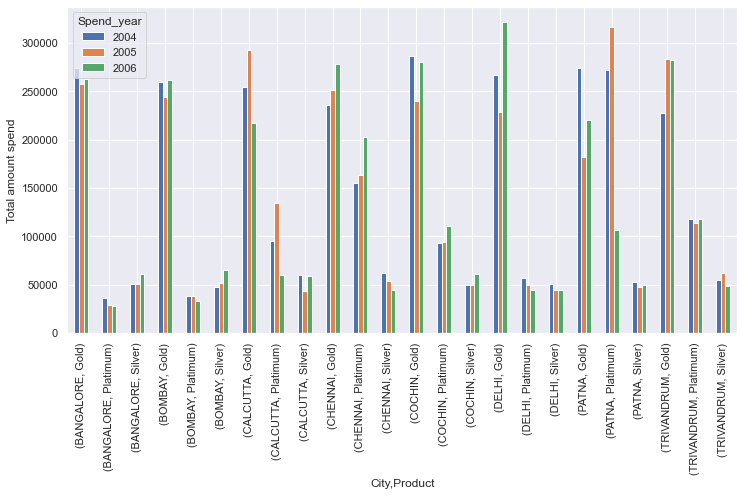

In [28]:
#Graph
sns.set()
pd.pivot_table(merge1,index=['City','Product'],columns='Spend_year',values='Spend').plot.bar(figsize=(12,6))
plt.ylabel('Total amount spend')
plt.show()

In [ ]:
# 4. Create graphs for
# a. Monthly comparison of total spends, city wise

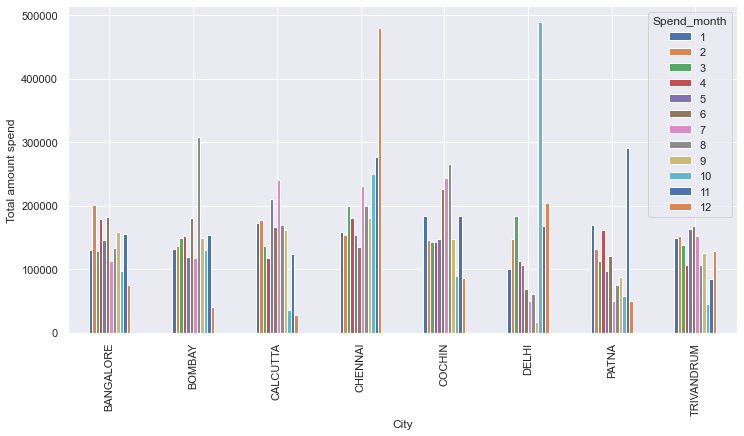

In [29]:
sns.set()
pd.pivot_table(merge1,index=['City'],columns='Spend_month',values='Spend').plot.bar(figsize=(12,6))
plt.ylabel('Total amount spend')
plt.show()

In [ ]:
# b. Comparison of yearly spend on air tickets 

In [30]:
air=merge1.loc[merge1.Type=="AIR TICKET"]
air_spend=air.groupby('Spend_year')['Spend'].sum()

In [42]:
# air_spend=air.groupby('Spend_year').aggregate({"Spend":['sum']})

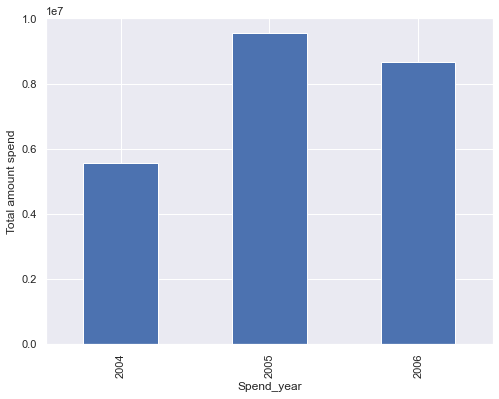

In [31]:
sns.set()
air_spend.plot.bar(figsize=(8,6))
plt.ylabel('Total amount spend')
plt.show()

In [49]:
# c. Comparison of monthly spend for each product (look for any seasonality
# that exists in terms of spend)

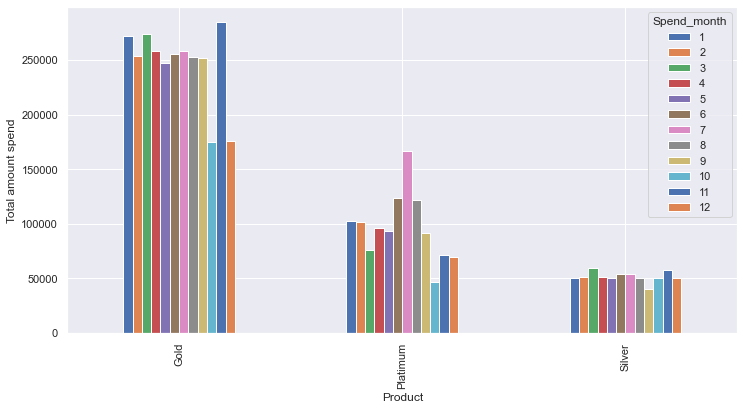

In [32]:
sns.set()
pd.pivot_table(merge1,index=['Product'],columns='Spend_month',values='Spend').plot.bar(figsize=(12,6))
plt.ylabel('Total amount spend')
plt.show()

In [ ]:
# 5. Write user defined PYTHON function to perform the following analysis:
# You need to find top 10 customers for each city in terms of their repayment amount by
# different products and by different time periods i.e. year or month. The user should be able
# to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
# function should automatically take these inputs while identifying the top 10 customers.

In [33]:
def top10(prod,duration):
    data=merge2.loc[merge2.Product==prod]
    data=data.groupby(['City','Repay_'+duration,'Customer'])['Amount'].sum()
    return data.groupby(['City','Repay_'+duration]).nlargest(10)

In [34]:
top10('Silver','year')

City        Repay_year  City        Repay_year  Customer
BANGALORE   2004        BANGALORE   2004        A23         1.507695e+07
                                                A59         1.069328e+07
                                                A18         1.020097e+07
                                                A72         1.000000e+05
            2005        BANGALORE   2005        A23         2.185119e+07
                                                A18         1.400000e+07
                                                A59         1.103711e+07
                                                A76         3.026389e+05
            2006        BANGALORE   2006        A23         2.359961e+07
                                                A18         1.391723e+07
                                                A59         1.003930e+07
                                                A77         2.987964e+05
BOMBAY      2004        BOMBAY      2004        A22         3.63000